In [313]:
# 포폴에도 Seaborn 쓴거 있어야 해요
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [320]:
Integration = pd.read_csv("../../Data/03.통합.csv")
Integration.head()

,년도,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액
0,2013,경기도,12234630,1821303,112129,286,739619,49143,248468.3,13718.5
1,2013,서울특별시,10143645,1620640,84066,395,469392,48097,462443.1,532689.2
2,2013,경상남도,3333820,423864,29504,65,190166,12612,57288.6,6703.3
3,2013,부산광역시,3527635,496161,25831,82,160821,13902,77411.6,59554.5
4,2013,대구광역시,2501588,363224,19340,86,136309,9981,46578.5,37541.7


In [321]:
Integration.loc[:,"총인구":].columns

Index(['총인구', '전출인구', '출생아수', '산부인과의원수', '초등학생인원수', '도매 및 소매업 신생', '예금은행대출금액',
       '예금액'],
      dtype='object')

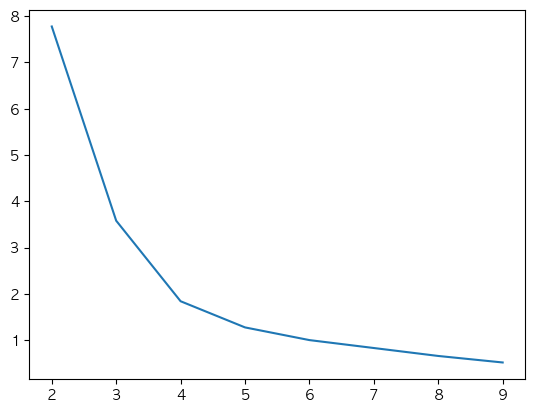

In [322]:
data = Integration[Integration.loc[:,"총인구":].columns]
    # 정규화 진행
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data)
scores = []
for k in range(2,10):
    km = KMeans(n_clusters=k,random_state=42)
    km.fit(data_scale)
    scores.append(km.inertia_)
plt.plot(range(2,10),scores)
plt.show()

In [330]:
from sklearn.cluster import KMeans

k = 5

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(data_scale)
print(k)
# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
Integration['cluster'] = model.fit_predict(data_scale)

5


5


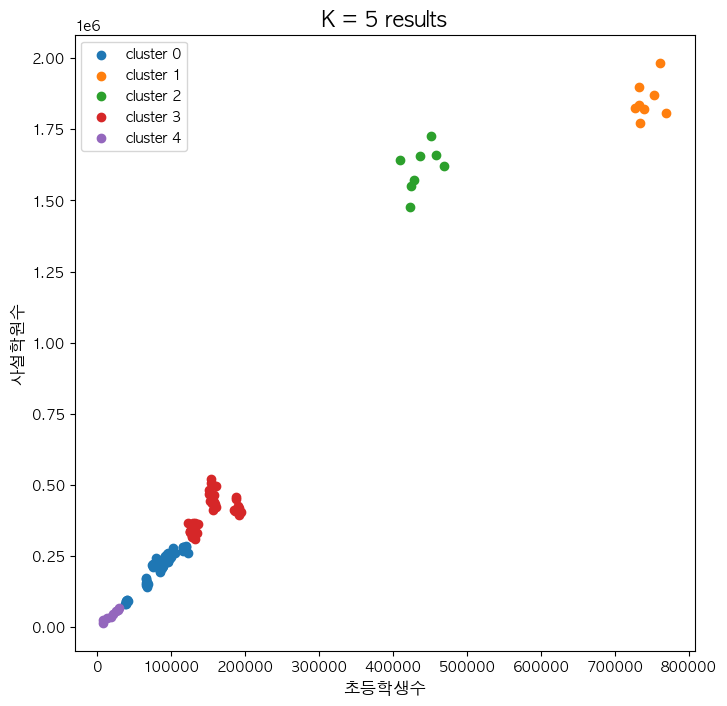

In [331]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(Integration.loc[Integration['cluster'] == i, '초등학생인원수'], Integration.loc[Integration['cluster'] == i, '전출인구'], 
                label = 'cluster ' + str(i))
print(k)
plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('초등학생수', size = 12)
plt.ylabel('사설학원수', size = 12)
plt.show()

In [332]:
Integration.tail(17)

,년도,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,cluster
119,2020,경기도,13427014,1984199,77737,265,761731,63145,419831.8,24939.5,1
120,2020,서울특별시,9668465,1642977,47445,385,409536,49581,726164.1,898371.8,2
121,2020,경상남도,3340216,419997,16823,59,190849,12160,82937.6,10308.9,3
122,2020,부산광역시,3391946,506176,15058,67,153527,14454,132190.5,101058.8,3
123,2020,대구광역시,2418346,364083,11193,87,122587,9605,88740.3,57156.5,3
124,2020,인천광역시,2942828,460304,16040,60,156928,13214,102078.5,51948.8,3
125,2020,전라북도,1804104,257577,8165,48,94661,6953,33132.0,25070.1,0
126,2020,경상북도,2639422,334679,12873,53,129079,9471,47189.5,51352.9,3
127,2020,광주광역시,1450062,232246,7318,36,86419,5810,42161.3,28573.7,0
128,2020,충청남도,2121029,286386,11950,43,120115,8409,41097.0,38260.0,0


In [90]:
Integration['cluster'] = Integration.cluster + 1

In [324]:
Integration.cluster.unique()

array([2, 1, 0, 3], dtype=int32)

In [327]:
Integration.tail(17)

,년도,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,cluster
119,2020,경기도,13427014,1984199,77737,265,761731,63145,419831.8,24939.5,2
120,2020,서울특별시,9668465,1642977,47445,385,409536,49581,726164.1,898371.8,1
121,2020,경상남도,3340216,419997,16823,59,190849,12160,82937.6,10308.9,0
122,2020,부산광역시,3391946,506176,15058,67,153527,14454,132190.5,101058.8,0
123,2020,대구광역시,2418346,364083,11193,87,122587,9605,88740.3,57156.5,0
124,2020,인천광역시,2942828,460304,16040,60,156928,13214,102078.5,51948.8,0
125,2020,전라북도,1804104,257577,8165,48,94661,6953,33132.0,25070.1,3
126,2020,경상북도,2639422,334679,12873,53,129079,9471,47189.5,51352.9,0
127,2020,광주광역시,1450062,232246,7318,36,86419,5810,42161.3,28573.7,3
128,2020,충청남도,2121029,286386,11950,43,120115,8409,41097.0,38260.0,3


In [19]:
Integration['cluster'].unique()
# 머신러닝 모듈
# sklearn의 preprocessing기능을 사용하면 최대값과 최소값을 비교하면서 정규화가 진행된다
from sklearn import preprocessing

In [92]:
# 정규화를 진행할 컬럼 설정
from sklearn.preprocessing import MinMaxScaler

x =Integration['cluster'].values
x =x.reshape(1, -1)
x.astype(float)


array([[2., 3., 4., 4., 4., 4., 1., 4., 1., 1., 1., 1., 1., 1., 1., 1.,
        5., 2., 3., 4., 4., 4., 4., 1., 4., 1., 1., 1., 1., 1., 1., 1.,
        1., 5., 2., 3., 4., 4., 4., 4., 1., 4., 1., 1., 1., 1., 1., 1.,
        1., 1., 5., 2., 3., 4., 4., 4., 4., 1., 4., 1., 1., 1., 1., 1.,
        1., 1., 1., 5., 2., 3., 4., 4., 4., 4., 1., 4., 1., 1., 1., 1.,
        1., 1., 1., 1., 5., 2., 3., 4., 4., 4., 4., 1., 4., 1., 1., 1.,
        1., 1., 1., 1., 1., 5., 2., 3., 4., 4., 4., 4., 1., 4., 1., 1.,
        1., 1., 1., 1., 1., 1., 5., 2., 3., 4., 4., 4., 4., 1., 4., 1.,
        1., 1., 1., 1., 1., 1., 1., 5.]])

In [95]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

data = Integration['cluster'].values.reshape(-1, 1)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
print(scaled_data)

[[0.25]
 [0.5 ]
 [0.75]
 [0.75]
 [0.75]
 [0.75]
 [0.  ]
 [0.75]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [1.  ]
 [0.25]
 [0.5 ]
 [0.75]
 [0.75]
 [0.75]
 [0.75]
 [0.  ]
 [0.75]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [1.  ]
 [0.25]
 [0.5 ]
 [0.75]
 [0.75]
 [0.75]
 [0.75]
 [0.  ]
 [0.75]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [1.  ]
 [0.25]
 [0.5 ]
 [0.75]
 [0.75]
 [0.75]
 [0.75]
 [0.  ]
 [0.75]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [1.  ]
 [0.25]
 [0.5 ]
 [0.75]
 [0.75]
 [0.75]
 [0.75]
 [0.  ]
 [0.75]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [1.  ]
 [0.25]
 [0.5 ]
 [0.75]
 [0.75]
 [0.75]
 [0.75]
 [0.  ]
 [0.75]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [1.  ]
 [0.25]
 [0.5 ]
 [0.75]
 [0.75]
 [0.75]
 [0.75]
 [0.  ]
 [0.75]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [1.  ]
 [0.25]
 [0.5 ]
 [0.75]
 [0.75]
 [0.75]
 [0.75]


In [97]:
Integration['cluster'] = scaled_data
Integration

,년도,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,cluster,cluster_f
0,2013,경기도,12234630,1821303,112129,286,739619,49143,248468.3,13718.5,0.25,0.0
1,2013,서울특별시,10143645,1620640,84066,395,469392,48097,462443.1,532689.2,0.50,0.0
2,2013,경상남도,3333820,423864,29504,65,190166,12612,57288.6,6703.3,0.75,0.0
3,2013,부산광역시,3527635,496161,25831,82,160821,13902,77411.6,59554.5,0.75,0.0
4,2013,대구광역시,2501588,363224,19340,86,136309,9981,46578.5,37541.7,0.75,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
131,2020,충청북도,1600837,226441,8607,40,85135,6103,28669.1,27669.5,0.00,0.0
132,2020,대전광역시,1463882,243418,7481,44,79807,6405,39341.3,38725.4,0.00,0.0
133,2020,강원도,1542840,217897,7835,32,73478,5554,22831.4,23634.2,0.00,0.0
134,2020,제주특별자치도,674635,94736,3989,23,40575,2856,20182.3,14025.4,0.00,0.0


In [98]:
Integration.drop(columns="cluster_f",inplace=True)

In [103]:
Integration.loc[:,"cluster":]

,cluster
0,0.25
1,0.50
2,0.75
3,0.75
4,0.75
...,...
131,0.00
132,0.00
133,0.00
134,0.00


In [115]:
Integration.loc[:,"총인구":"예금액"].columns

Index(['총인구', '전출인구', '출생아수', '산부인과의원수', '초등학생인원수', '도매 및 소매업 신생', '예금은행대출금액',
       '예금액'],
      dtype='object')

In [137]:
Integration = Integration.sort_values(by="cluster")

In [157]:
Integration_T = Integration.iloc[:,2:].astype(float)

In [158]:
Integration_T.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 63 to 135
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   총인구          136 non-null    float64
 1   전출인구         136 non-null    float64
 2   출생아수         136 non-null    float64
 3   산부인과의원수      136 non-null    float64
 4   초등학생인원수      136 non-null    float64
 5   도매 및 소매업 신생  136 non-null    float64
 6   예금은행대출금액     136 non-null    float64
 7   예금액          136 non-null    float64
 8   cluster      136 non-null    float64
dtypes: float64(9)
memory usage: 10.6 KB


In [162]:
Integration_T

,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,cluster
63,1591625.0,197668.0,12742.0,47.0,84052.0,6105.0,22070.0,22611.6,0.0
26,2062273.0,279817.0,18200.0,46.0,115056.0,8001.0,29451.1,18907.1,0.0
27,1905780.0,260874.0,14817.0,23.0,95720.0,6799.0,17164.0,25822.9,0.0
28,1166377.0,173229.0,11556.0,31.0,65810.0,4020.0,21981.2,14873.6,0.0
29,1578933.0,213577.0,13366.0,47.0,86508.0,6539.0,19076.8,19741.1,0.0
...,...,...,...,...,...,...,...,...,...
118,340575.0,58674.0,3819.0,7.0,27892.0,1080.0,8803.9,223043.4,1.0
101,314126.0,55000.0,3703.0,6.0,24865.0,962.0,8351.6,206787.8,1.0
67,243048.0,35236.0,3297.0,4.0,17910.0,838.0,6747.6,184606.3,1.0
84,280100.0,47383.0,3504.0,4.0,20764.0,988.0,7585.8,195344.5,1.0


In [165]:
# 정규화된 범죄건수가 있는 데이터프레임 생성
crime_anal_norm = pd.DataFrame(x_scaler, columns=mothe, index=Integration_T.index)
crime_anal_norm

,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액
63,0.110446,0.092712,0.103493,0.114504,0.100913,0.090547,0.027138,0.023691
26,0.145820,0.134432,0.152059,0.111959,0.141566,0.120777,0.037337,0.019561
27,0.134058,0.124811,0.121957,0.053435,0.116213,0.101612,0.020360,0.027271
28,0.078484,0.080301,0.092940,0.073791,0.076994,0.057303,0.027016,0.015064
29,0.109492,0.100792,0.109046,0.114504,0.104134,0.097466,0.023002,0.020490
...,...,...,...,...,...,...,...,...
118,0.016417,0.022124,0.024096,0.012723,0.027276,0.010427,0.008808,0.247135
101,0.014429,0.020259,0.023064,0.010178,0.023307,0.008546,0.008183,0.229013
67,0.009087,0.010221,0.019451,0.005089,0.014187,0.006569,0.005967,0.204284
84,0.011871,0.016390,0.021293,0.005089,0.017929,0.008961,0.007125,0.216256


In [235]:
Integration

,년도,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,cluster
63,2016,충청북도,1591625,197668,12742,47,84052,6105,22070.0,22611.6,0.0
26,2014,충청남도,2062273,279817,18200,46,115056,8001,29451.1,18907.1,0.0
27,2014,전라남도,1905780,260874,14817,23,95720,6799,17164.0,25822.9,0.0
28,2014,울산광역시,1166377,173229,11556,31,65810,4020,21981.2,14873.6,0.0
29,2014,충청북도,1578933,213577,13366,47,86508,6539,19076.8,19741.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
118,2019,세종특별자치시,340575,58674,3819,7,27892,1080,8803.9,223043.4,1.0
101,2018,세종특별자치시,314126,55000,3703,6,24865,962,8351.6,206787.8,1.0
67,2016,세종특별자치시,243048,35236,3297,4,17910,838,6747.6,184606.3,1.0
84,2017,세종특별자치시,280100,47383,3504,4,20764,988,7585.8,195344.5,1.0


In [240]:
Integration_Nor

,년도,시도
63,2016,충청북도
26,2014,충청남도
27,2014,전라남도
28,2014,울산광역시
29,2014,충청북도
...,...,...
118,2019,세종특별자치시
101,2018,세종특별자치시
67,2016,세종특별자치시
84,2017,세종특별자치시


In [243]:
Integration_Nor2 = Integration_T

In [252]:
Integration_No = Integration_Nor2.iloc[:,[9,10,0,1,2,3,4,5,6,7,8]]

In [260]:
Integration_No.sort_values(by=["시점","총인구"],ascending=False,inplace=True)
Integration_No.reset_index(inplace=True)

In [263]:
Integration_No = Integration_No.drop(columns="index")

In [312]:
Integration_No.to_csv("../../Data/study/03.통합_정규화.csv",index=None)

In [271]:
feature_df = Integration_No.loc[:,"총인구":"예금액"].to_numpy()
feature_df

array([[1.        , 1.        , 0.68182304, ..., 1.        , 0.57673416,
        0.02628575],
       [0.71750558, 0.82671082, 0.41228289, ..., 0.7837338 , 1.        ,
        1.        ],
       [0.24575928, 0.24938779, 0.1241013 , ..., 0.22366428, 0.17929408,
        0.11114458],
       ...,
       [0.07774053, 0.07215313, 0.09092931, ..., 0.05220109, 0.02367027,
        0.01474575],
       [0.03544968, 0.03347689, 0.03752313, ..., 0.0351887 , 0.00676477,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.15920944]])

In [274]:
target_df = Integration_No.loc[:,"cluster"].to_numpy()
target_df

array([0.25, 0.5 , 0.75, 0.75, 0.75, 0.75, 0.75, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.25, 0.5 , 0.75, 0.75, 0.75,
       0.75, 0.75, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       1.  , 0.25, 0.5 , 0.75, 0.75, 0.75, 0.75, 0.75, 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.25, 0.5 , 0.75, 0.75,
       0.75, 0.75, 0.75, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 1.  , 0.25, 0.5 , 0.75, 0.75, 0.75, 0.75, 0.75, 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.25, 0.5 , 0.75,
       0.75, 0.75, 0.75, 0.75, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 1.  , 0.25, 0.5 , 0.75, 0.75, 0.75, 0.75, 0.75, 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.25, 0.5 ,
       0.75, 0.75, 0.75, 0.75, 0.75, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 1.  ])

In [275]:
#train, test
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target =\
    train_test_split(feature_df,target_df, random_state=42)

In [276]:
from sklearn.preprocessing import PolynomialFeatures

In [265]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target =\
    train_test_split(Integration_No.loc[:,"총인구":"예금액"],Integration_No.loc[:,"cluster":])


In [277]:
# train_input을 다항 특성 만들기
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
# test_input 을 다항 특성으로 만들기
test_poly = poly.transform(test_input)

In [278]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print('Train scroe:', lr.score(train_poly,train_target))
print('Test scroe:', lr.score(test_poly,test_target))

Train scroe: 0.9696501394640467
Test scroe: -1.6606594539050223


In [281]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [282]:
lr.fit(train_poly, train_target)
print('Train scroe:', lr.score(train_poly,train_target))
print('Test scroe:', lr.score(test_poly,test_target))

Train scroe: 1.0
Test scroe: -24547.51008053334


---
### 규제 전에 표준화
표준점수(Z점수활용)

In [283]:
from sklearn.preprocessing import  StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

### Ridge(L2규제) 회귀
: 가중치의 제곱으로 규제하는 방법

In [284]:
from sklearn.linear_model import  Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target) 
print("Train Score : ", ridge.score(train_scaled,train_target))
print("Test Score : ", ridge.score(test_scaled,test_target))

Train Score :  0.8103115322775312
Test Score :  0.8099108958007872


### 적절한 규제 강도(Hyper paramter) 찾기

In [285]:
train_score = []
test_score = []

alpha_list = [0.001,0.01,0.1,1,10,100,1000]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled,train_target)
    train_score.append(ridge.score(train_scaled,train_target))
    test_score.append(ridge.score(test_scaled,test_target))

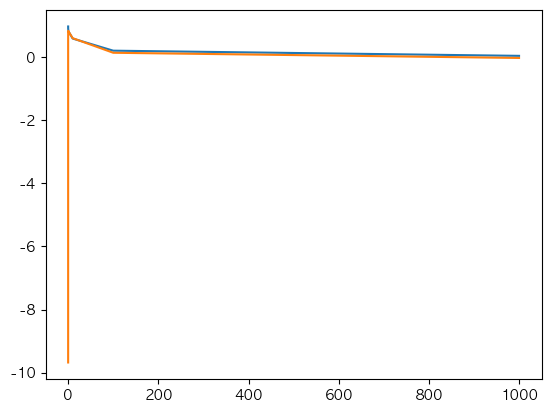

In [286]:
plt.plot(alpha_list,train_score)
plt.plot(alpha_list,test_score)

> x축의 데이터범위가 너무 커서 소수인 경우에는 확인 할 수 없음.

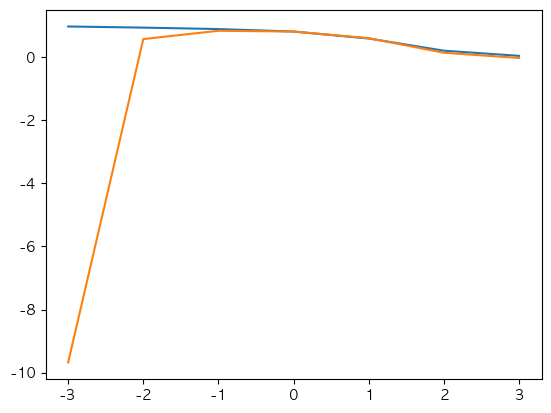

In [287]:
import numpy as np
plt.Figure(figsize=(10,5))
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

alpha가 -1인 경우가 train과 test가 제일 가깝다. <- 골디락스(Goldilocks) 포인트
-1은 실질적으로 0.1이다. 

In [304]:
ridge = Ridge(0.1)
ridge.fit(train_scaled, train_target) 
print("Train Score : ", ridge.score(train_scaled,train_target))
print("Test Score : ", ridge.score(test_scaled,test_target))

Train Score :  0.8891580029123027
Test Score :  0.8346995390105256


In [310]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

predict_proba() 메서드로 클래스별 확률값을 반환한다. 테스트 세트에 있는 처음 5개의 샘플에 대한 확률을 출력해 보자. 넘파이 round() 함수는 기본으로 소수점 첫째 자리에서 반올림 하는데, decimals 매개변수로 유지할 소수점 아래 자릿수를 지정할 수 있다

---
### l1규제(Lasso) 회귀
: 가중치의 절대값으로 규제하는 방법

In [289]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled,train_target)
print('Train score:',lasso.score(train_scaled,train_target))
print('Test score:',lasso.score(test_scaled,test_target))

Train score: 0.0
Test score: -0.07922360863537325


In [290]:
# 최적값찾기
train_score = []
test_score = []

alpha_list = [0.001,0.01,0.1,1,10,100,1000]
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha)
    lasso.fit(train_scaled,train_target)
    train_score.append(lasso.score(train_scaled,train_target))
    test_score.append(lasso.score(test_scaled,test_target))

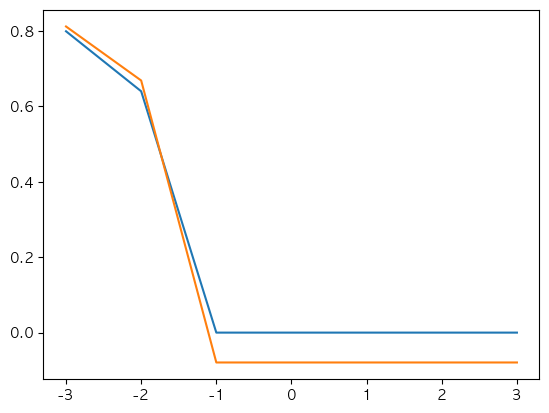

In [291]:
plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.show()

In [294]:
lasso = Lasso(alpha=)
lasso.fit(train_scaled,train_target)
print('Train score:',lasso.score(train_scaled,train_target))
print('Test score:',lasso.score(test_scaled,test_target))

Train score: -195468.46500558752
Test score: -271149290.77904433


> Lasso인 경우에 기울기(가중치:weight)를 0으로 변경하는 경우가 발생한다.

In [293]:
# 기울기가 0인 경우
np.sum(lasso.coef_==0)

1286